In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import perform_eda as ed
import model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import fbeta_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

In [42]:
# load the dataset
df = pd.read_csv('../data/census.csv')

In [43]:
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlgt           32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [45]:
df.isna().sum(axis=0)

age                0
 workclass         0
 fnlgt             0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

In [46]:
df.describe()

,age,fnlgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [47]:
#Removing leading/trailing whitespaces
df.columns = [c.strip() for c in df.columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlgt           32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [28]:
# Check the shape of the dataframe
print("Shape of the dataset:", df.shape)

Shape of the dataset: (32537, 15)


In [48]:
# chaning column names to use _ instead of -
columns = df.columns
columns = [col.replace('-', '_') for col in columns]
df.columns = columns
    
# remove duplicates
df = df[~df.duplicated()]

In [50]:
# make all characters to be lowercase in string columns
df = df.map(
    lambda s: s.lower() if isinstance(s, str) else s)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlgt           32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


### Categorical variables

In [52]:
# extract the categorical variables
cat_var = [ feature for feature in df.columns if df[feature].dtypes=='O']
print('List of categorical variables {}'.format(cat_var))

List of categorical variables ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']


In [53]:
#Removing leading/trailing whitespaces
for c in cat_var:
    df[c] = df[c].str.strip()

In [54]:
#display the all the categorical variable 
#for feature in cat_var:
    #plot = ed.plot_snsbarplot(df, feature)
    #plot.show() 

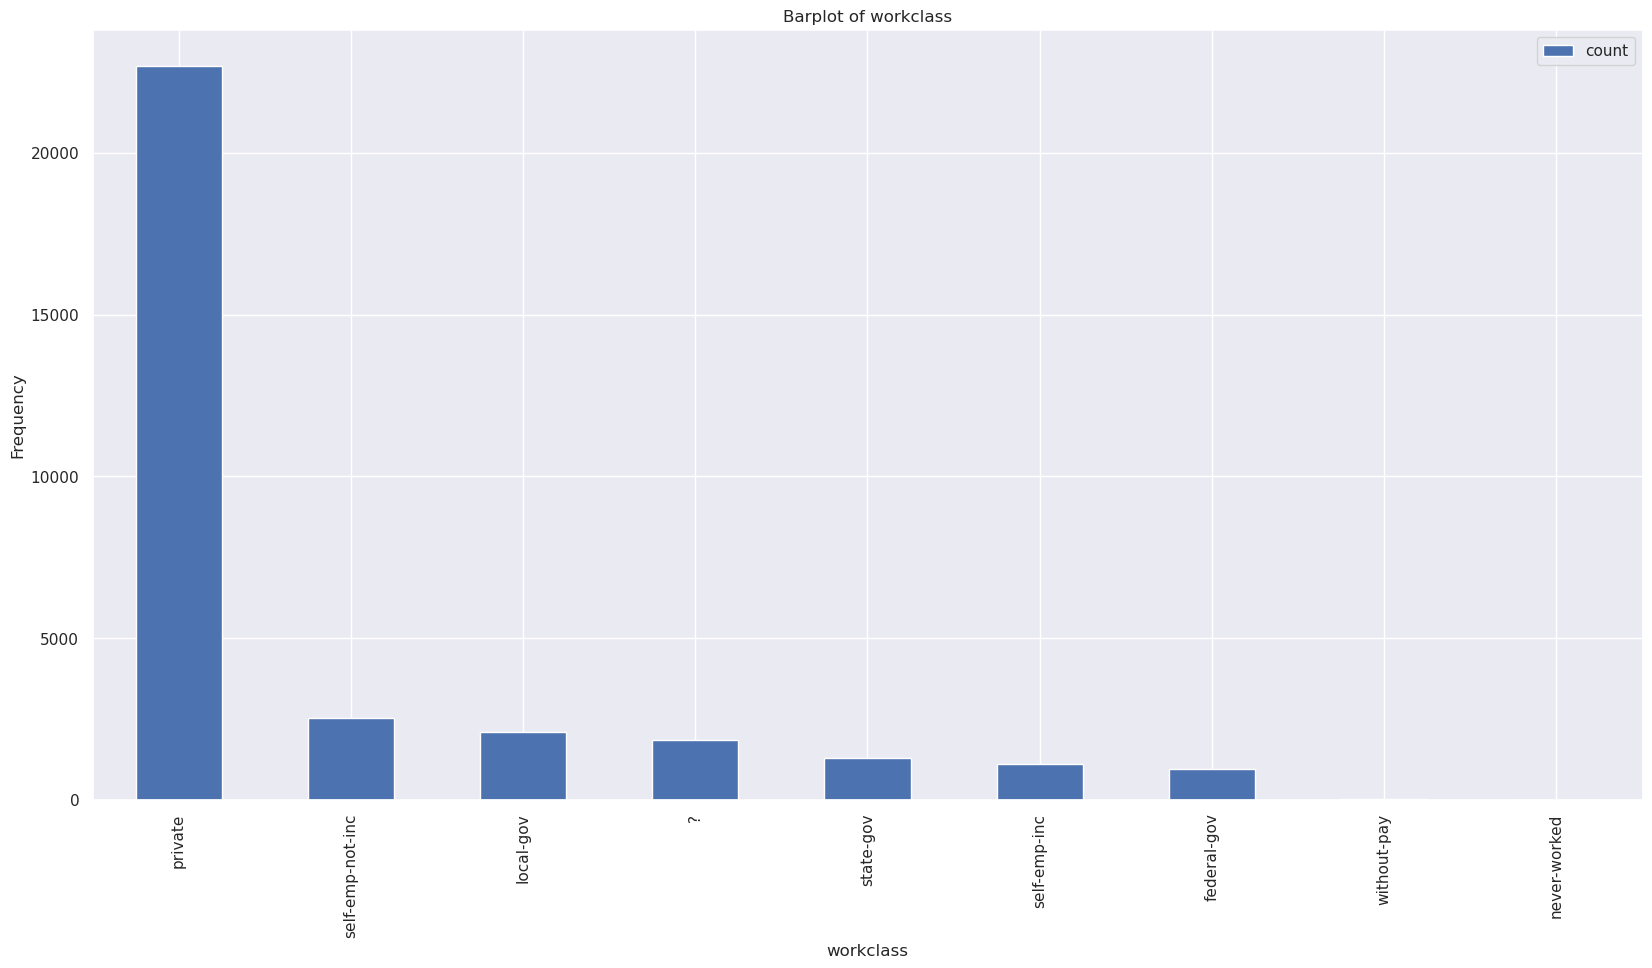

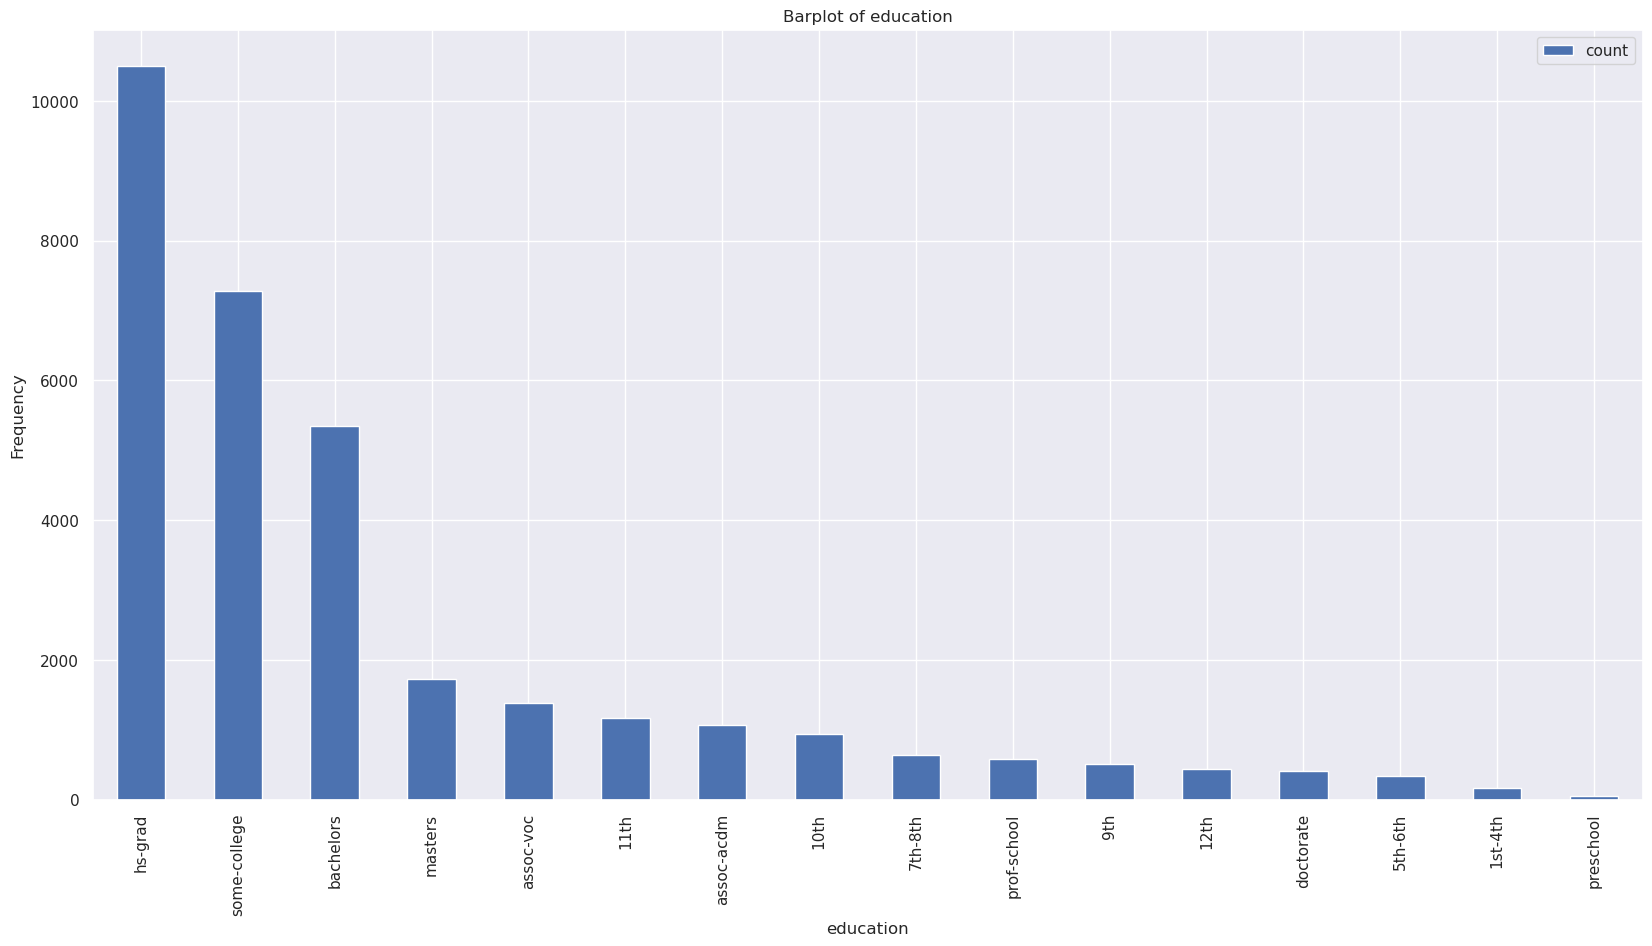

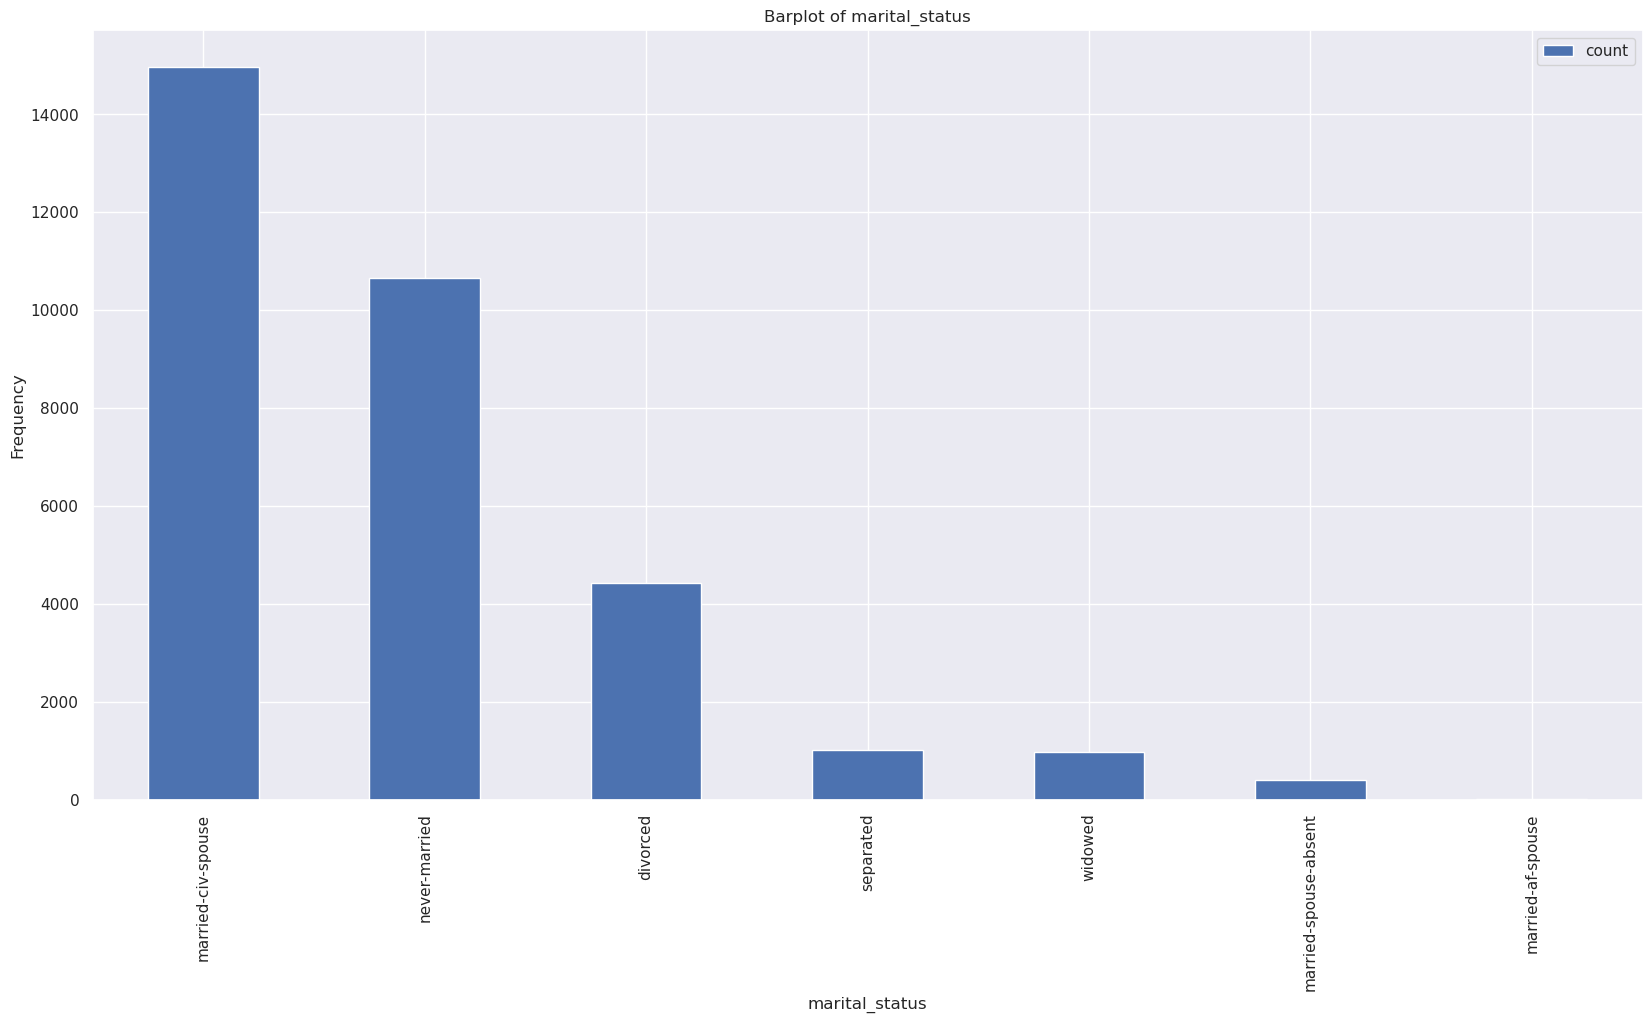

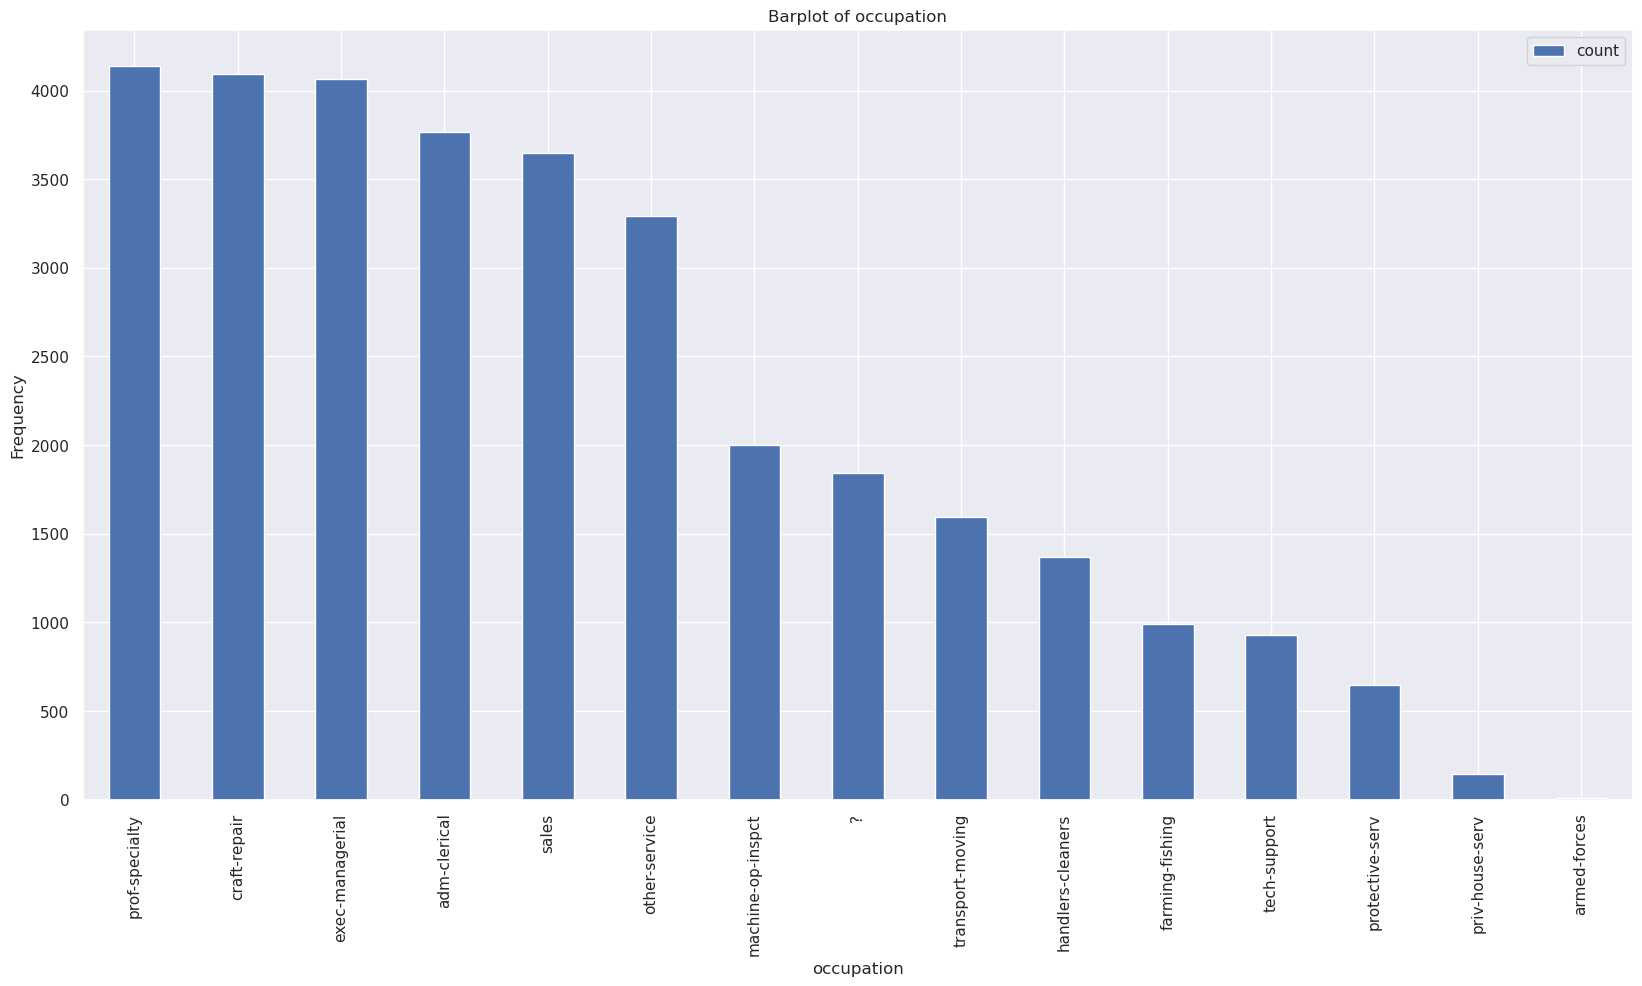

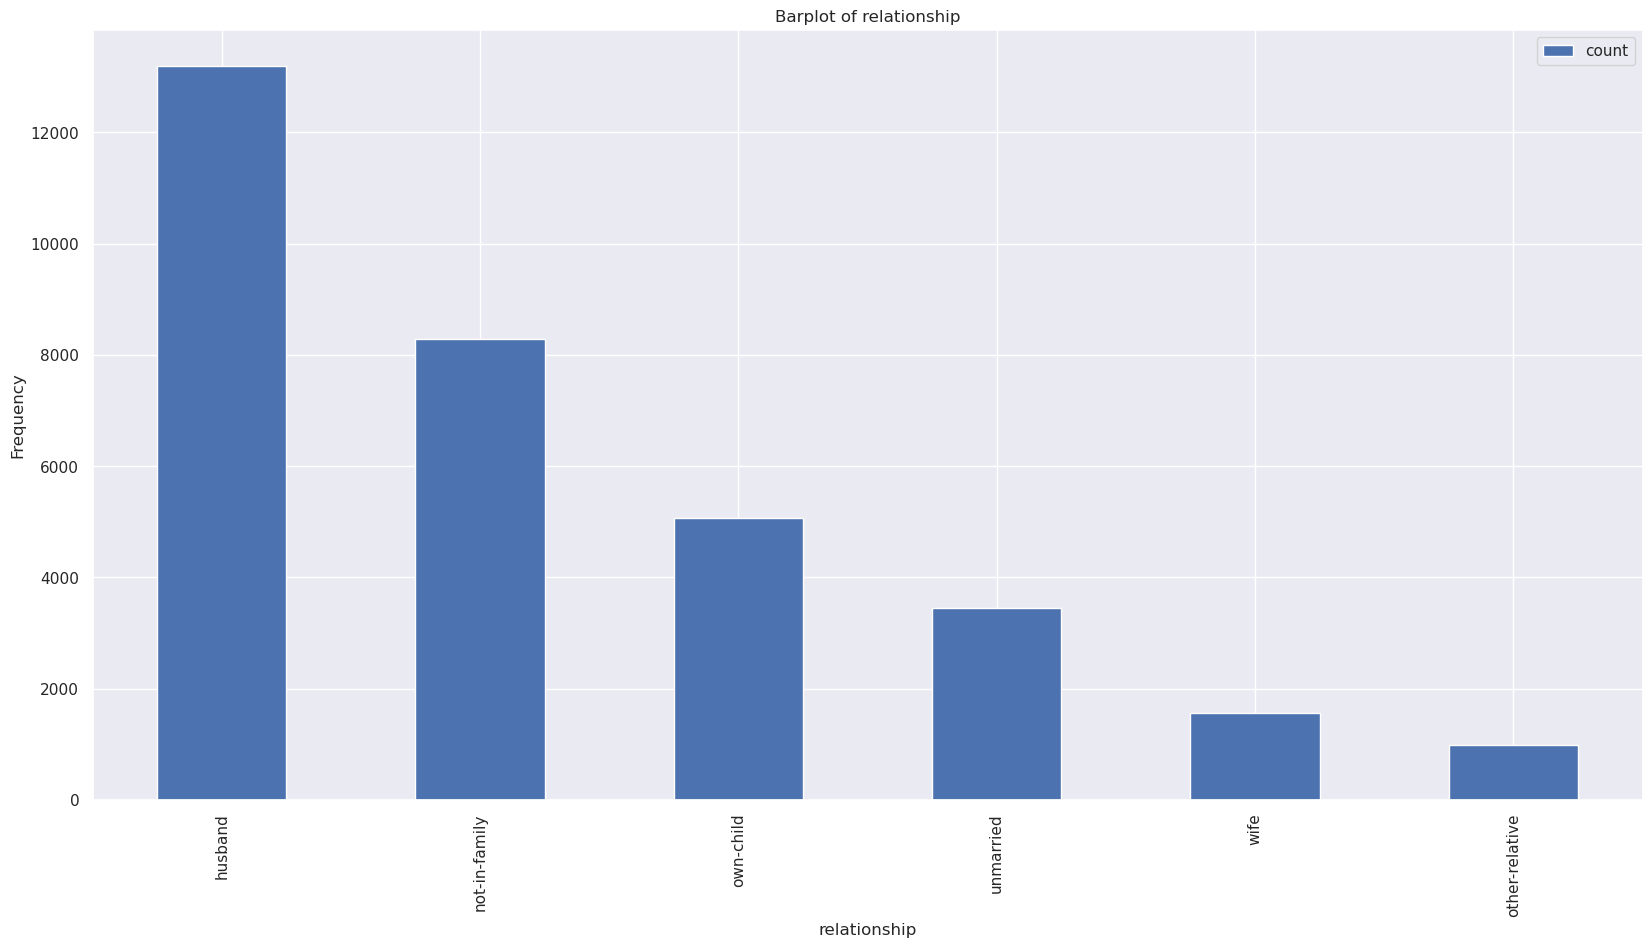

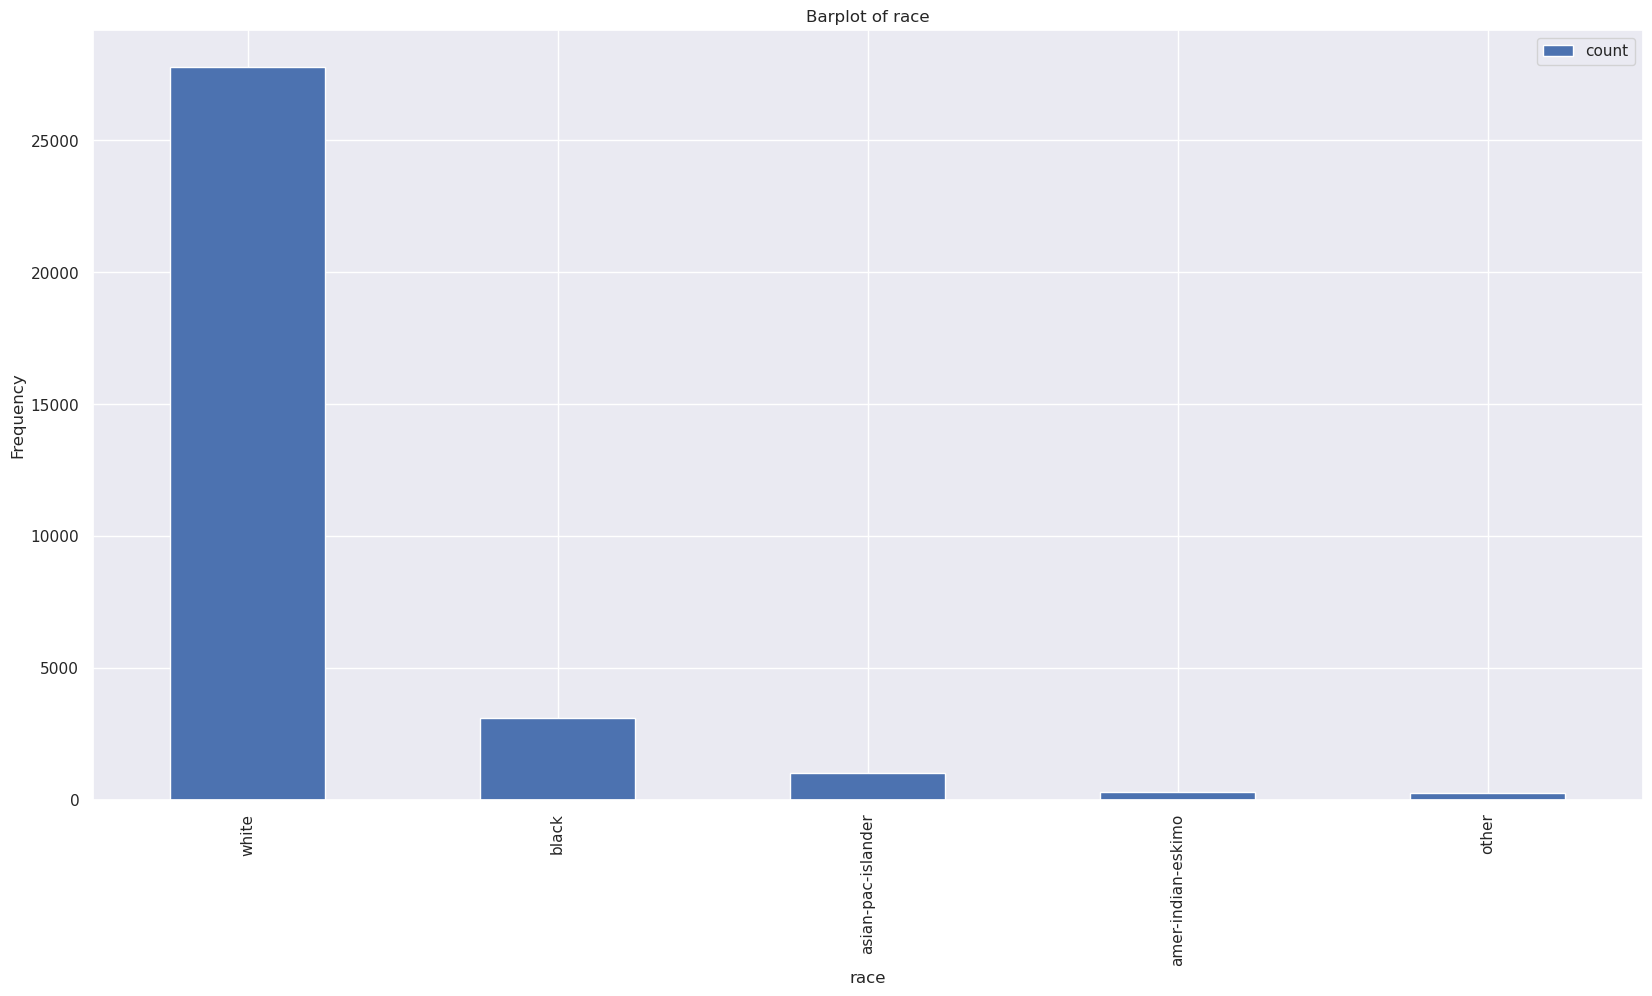

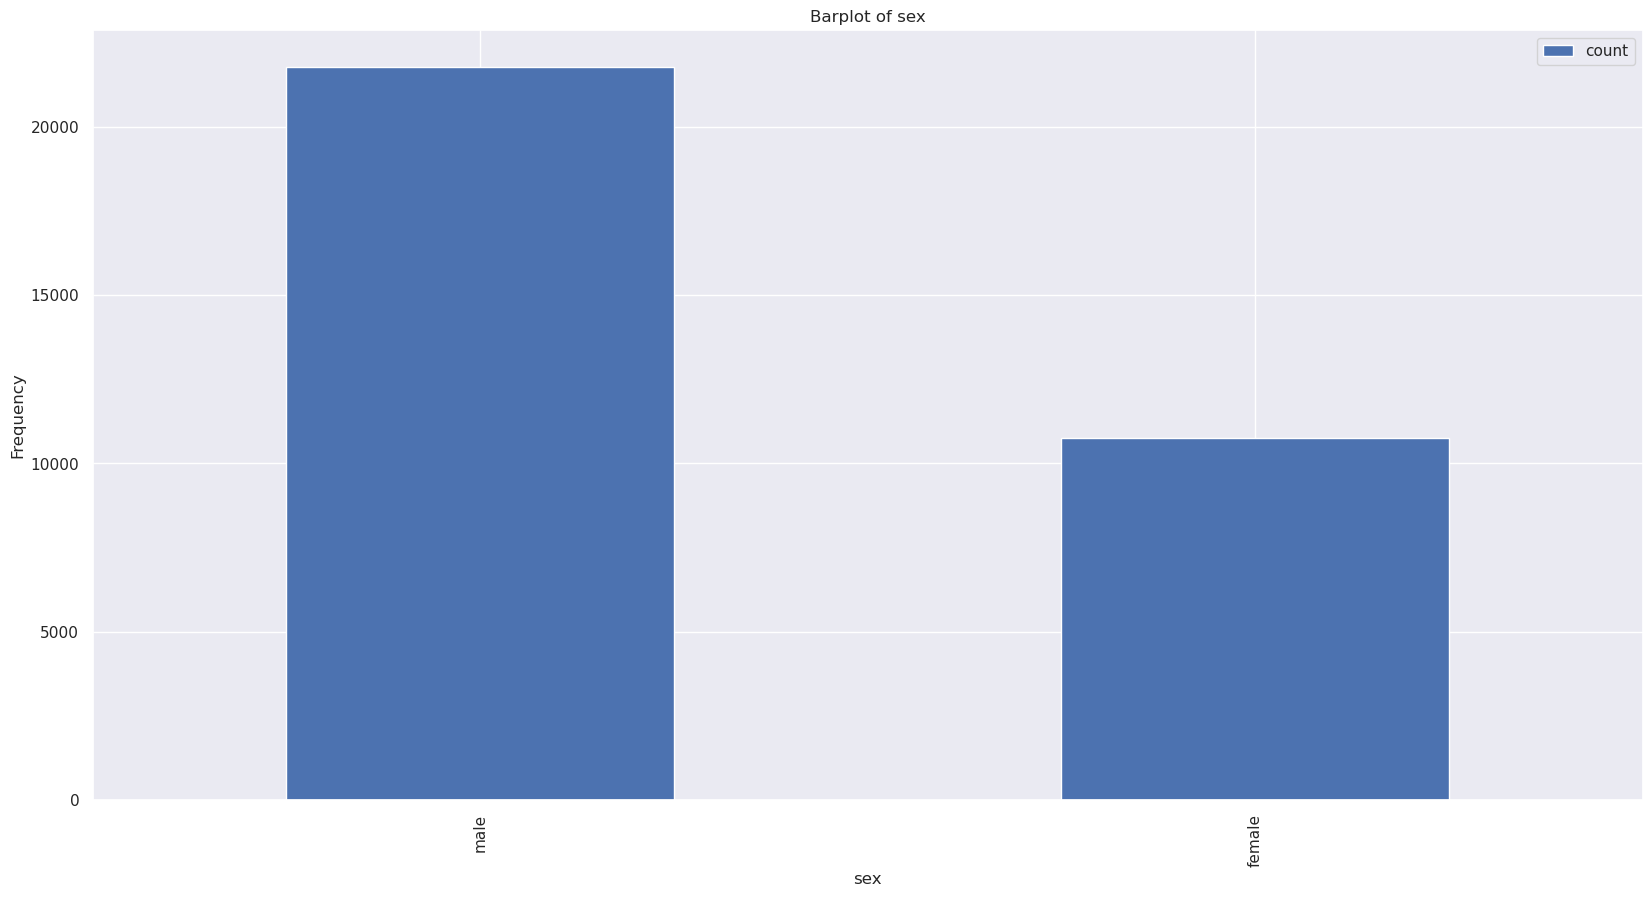

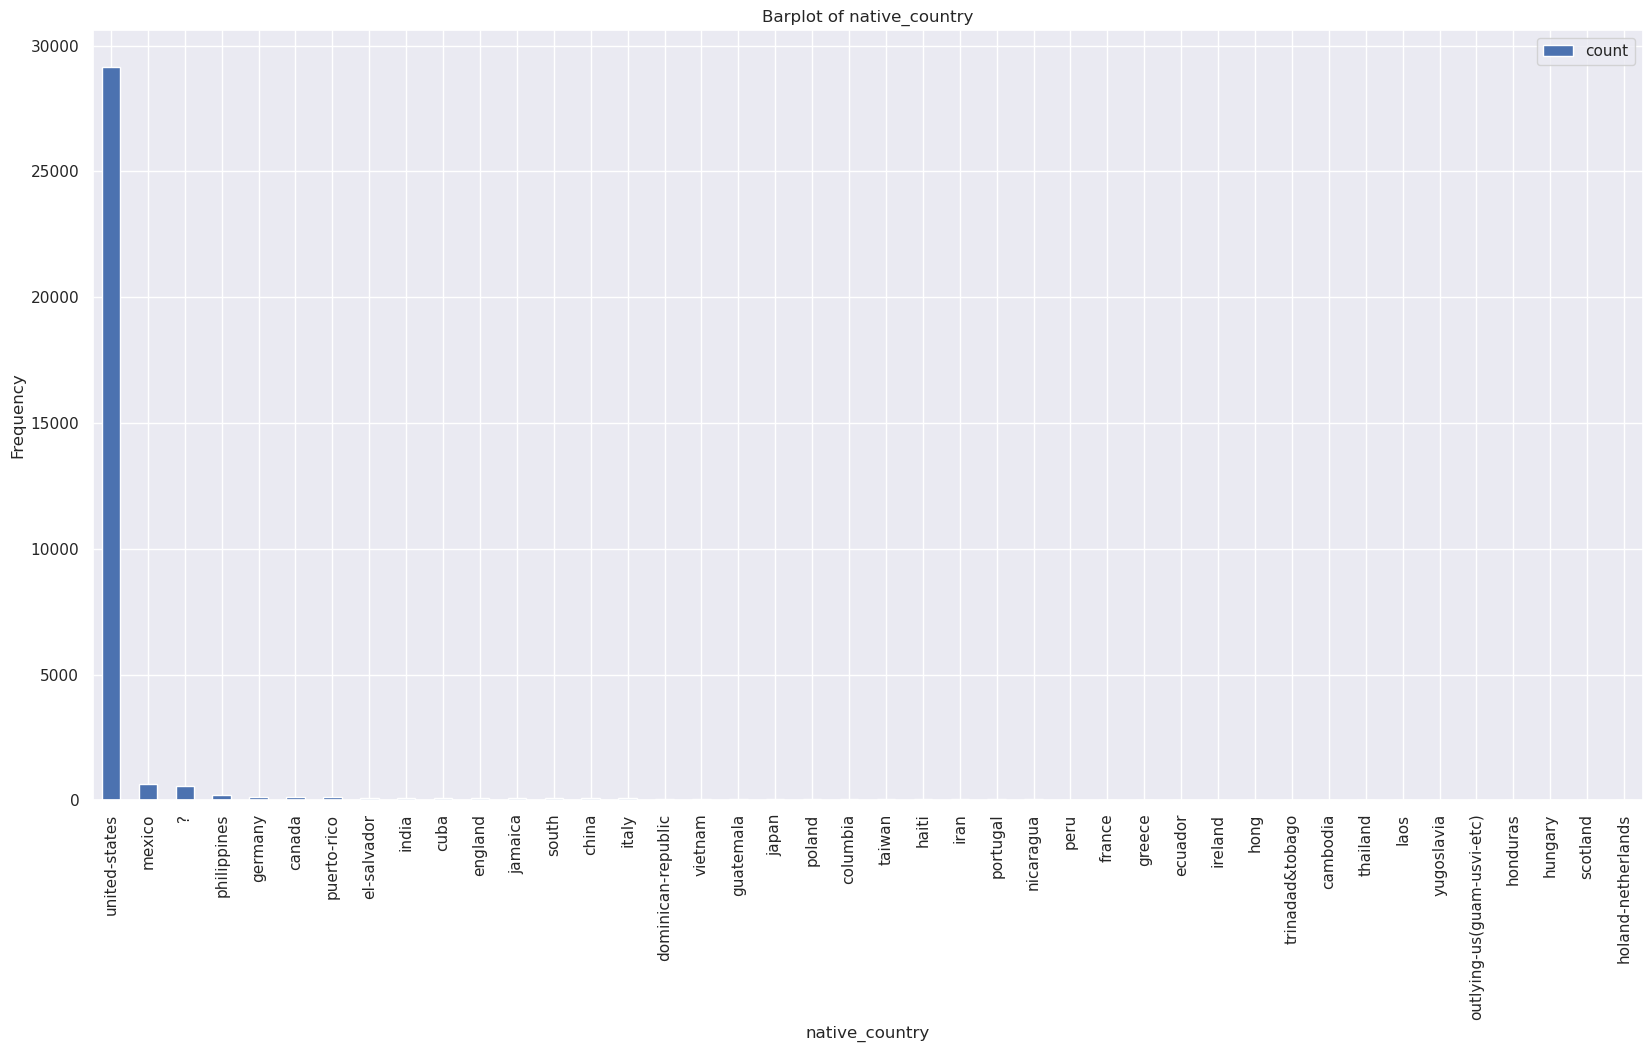

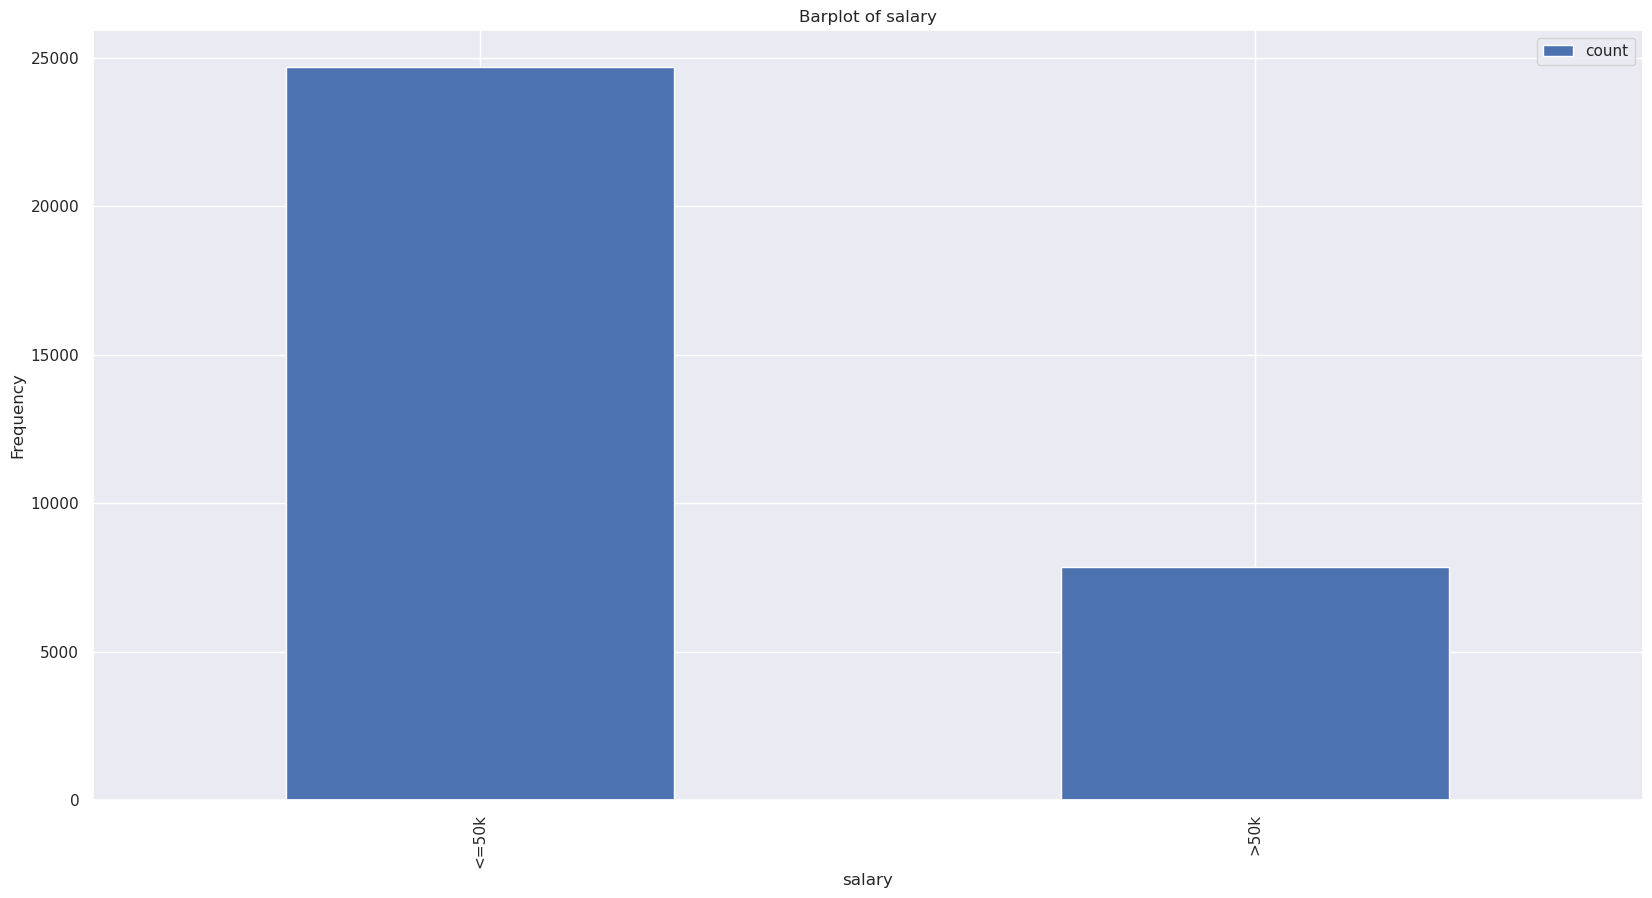

In [55]:
# get barplots for the categorical features
for col in cat_var:
    plot = ed.plot_barplot(df, col)
    plot.show()

### Numerical variables

In [56]:
#Extract the numerical features from the dataset
num_var = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('List of Numerical featues {}'.format(num_var))

List of Numerical featues ['age', 'fnlgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


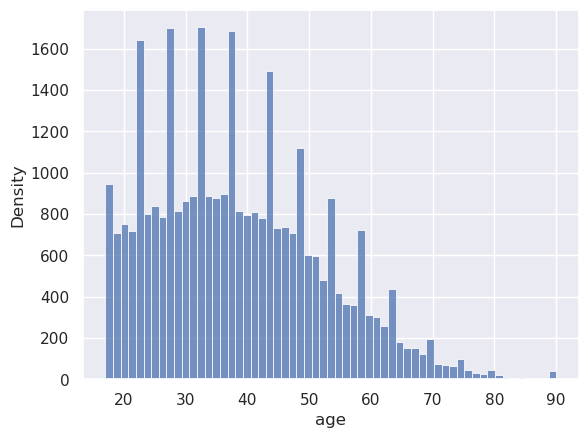

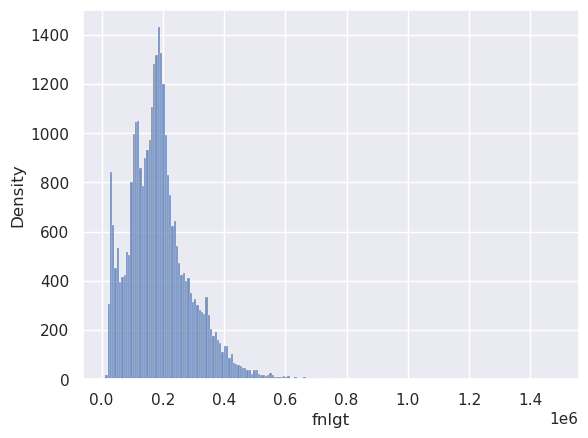

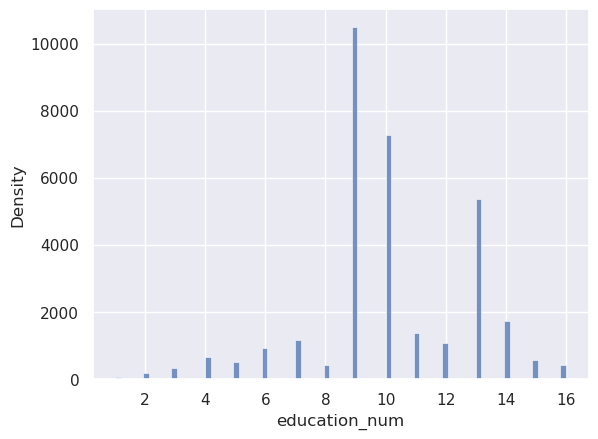

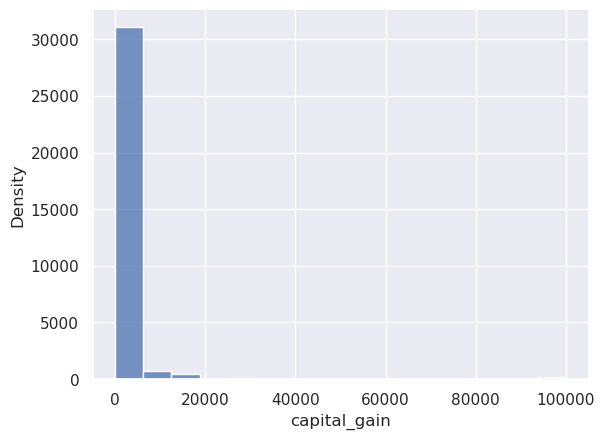

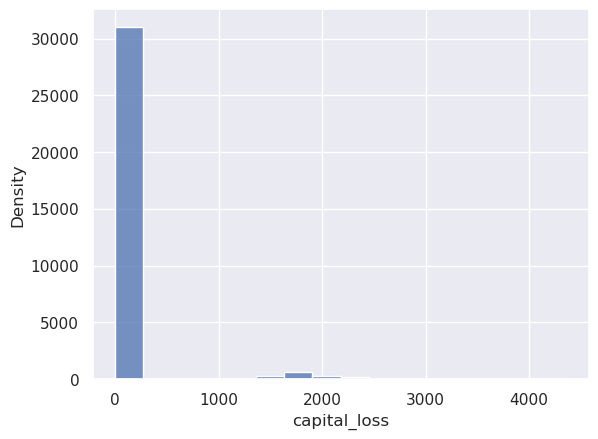

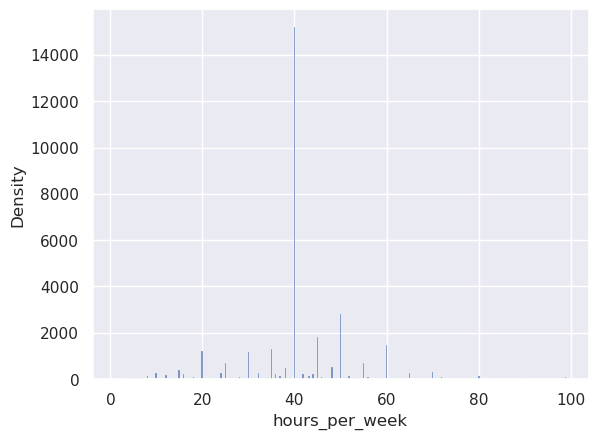

In [57]:
# Density plot of all the numerical features
for feature in num_var:
    plot = ed.density_plot(df, feature)

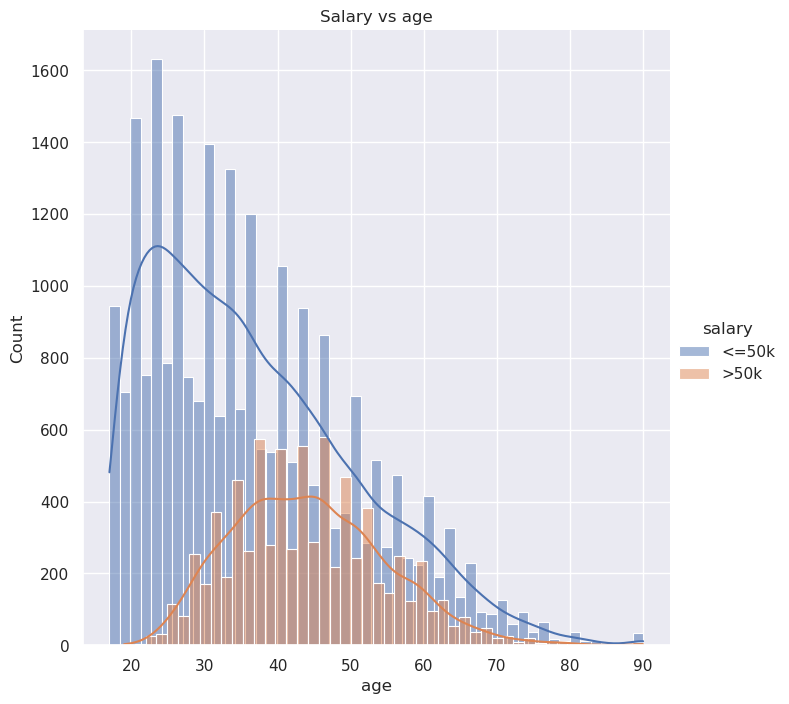

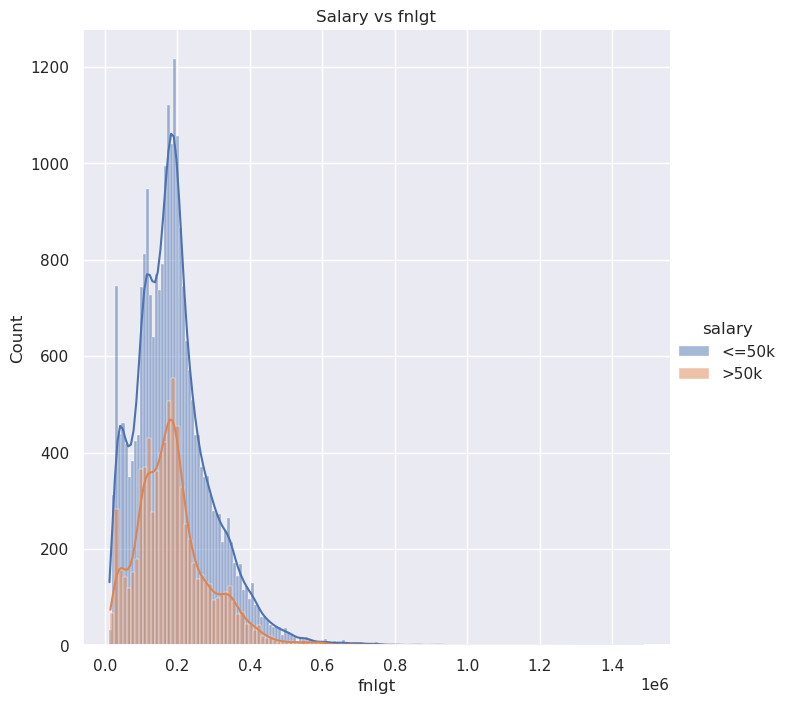

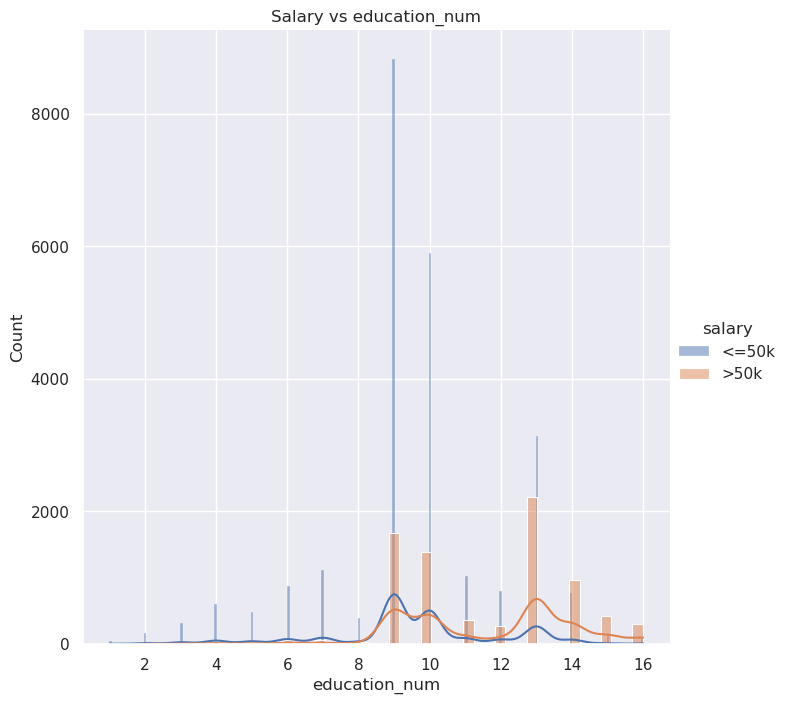

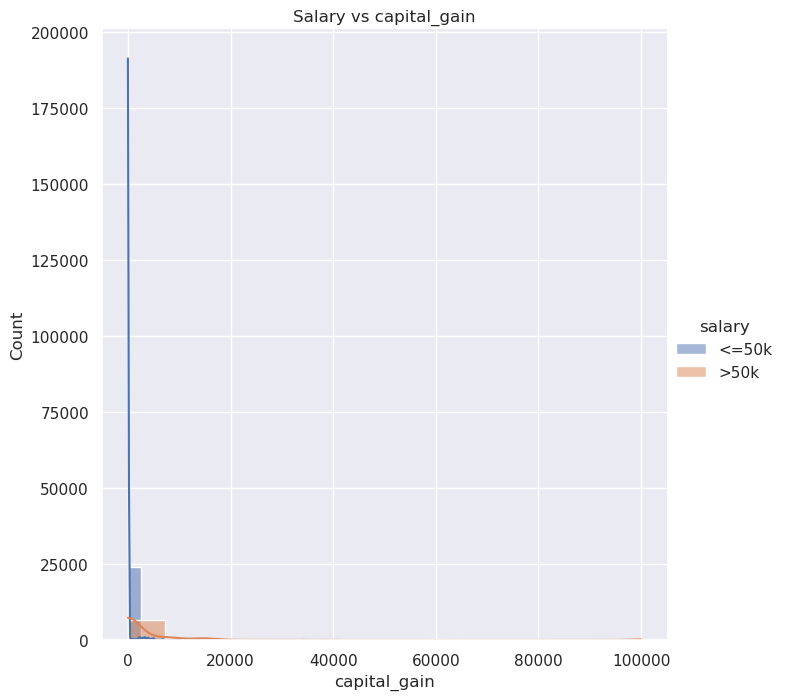

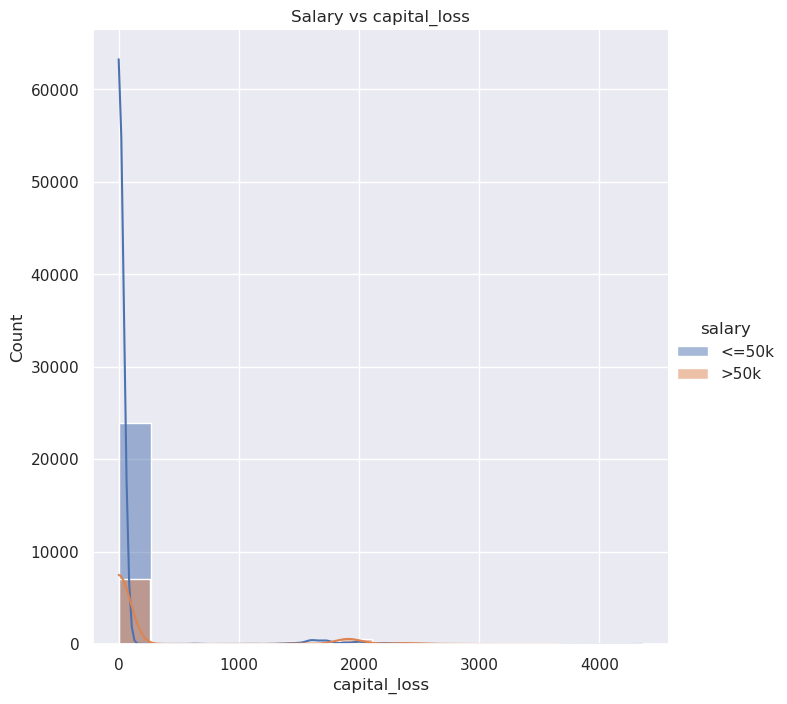

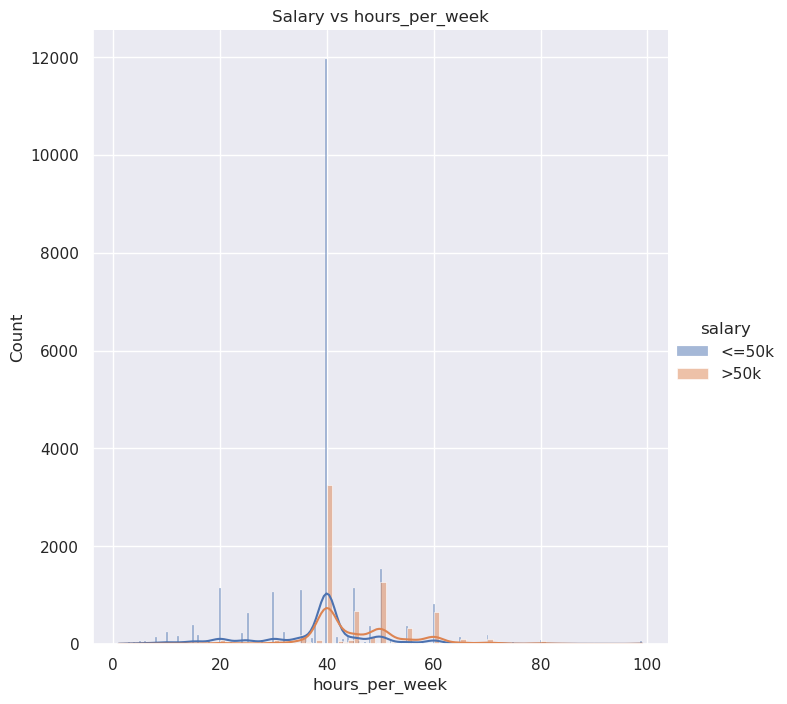

In [58]:
for feature in num_var:
    plot = ed.bivariare_hist_plot(df, 'salary', feature)

In [59]:
#for feature in num_var:
    #plot = ed.bivariare_density_plot(df, 'salary', feature)

### Outlier detection and removal

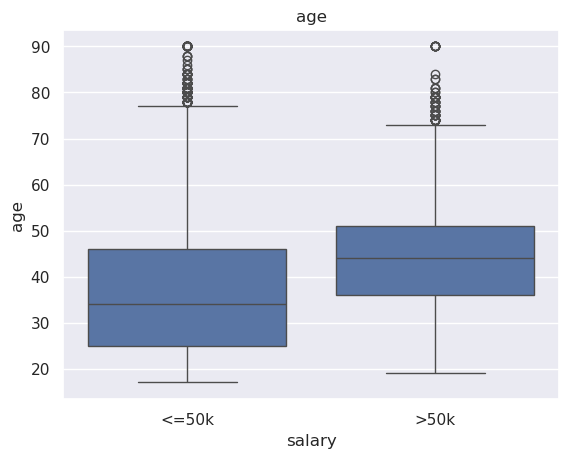

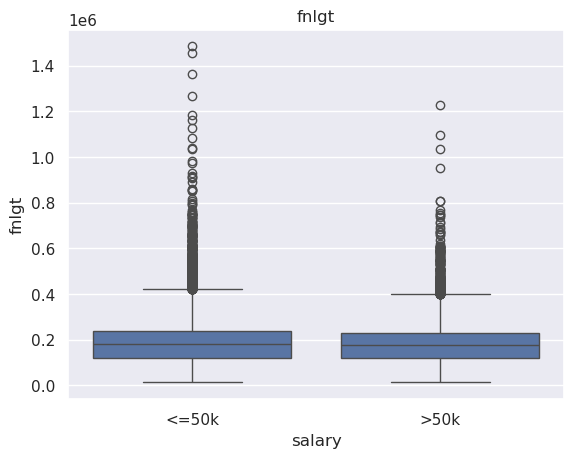

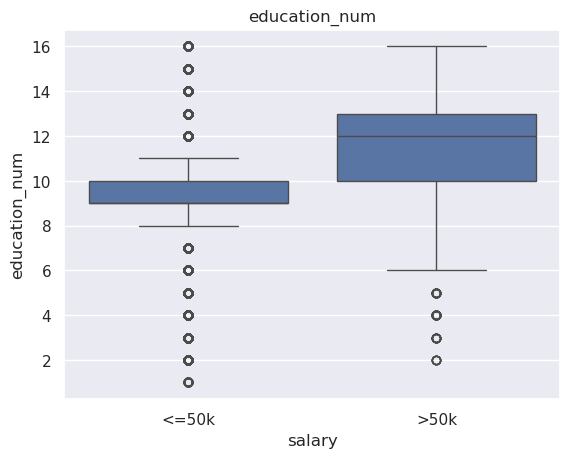

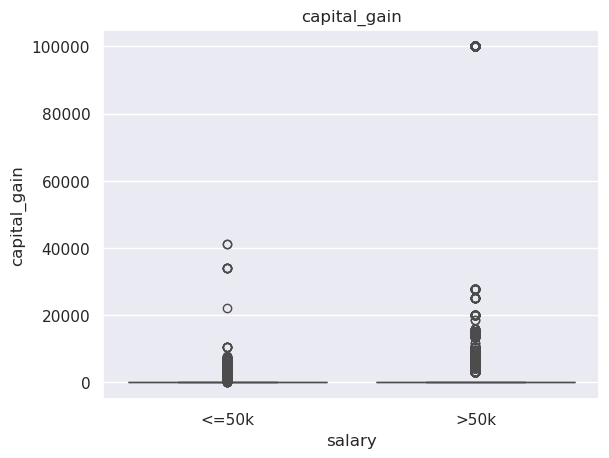

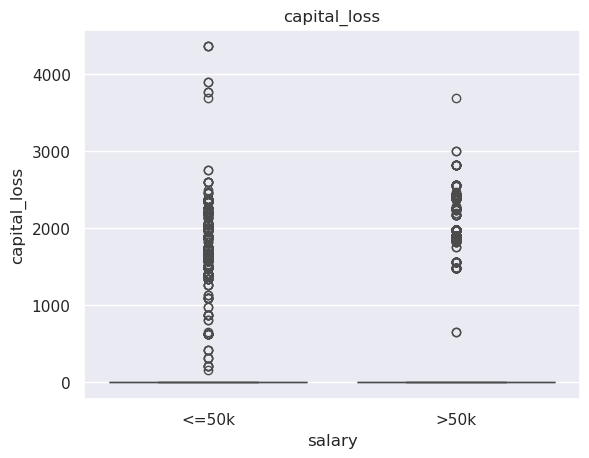

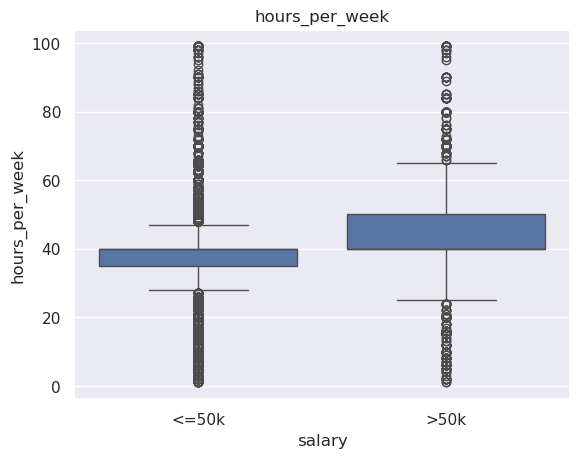

In [60]:
for feature in num_var:
    plot = ed.outlier_detection(df, 'salary', feature)

#### Removing outliers

In [61]:
df = ed.remove_outliers(df, num_var)

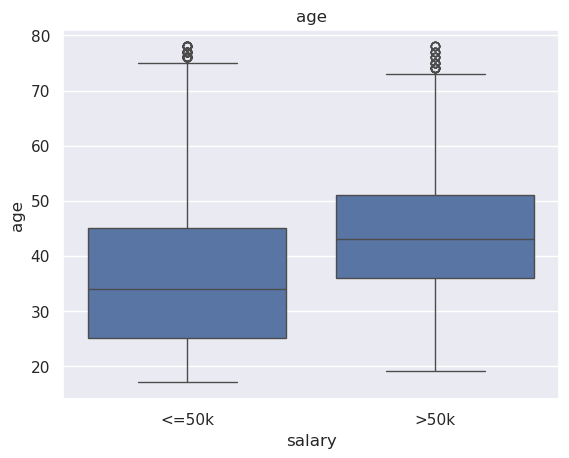

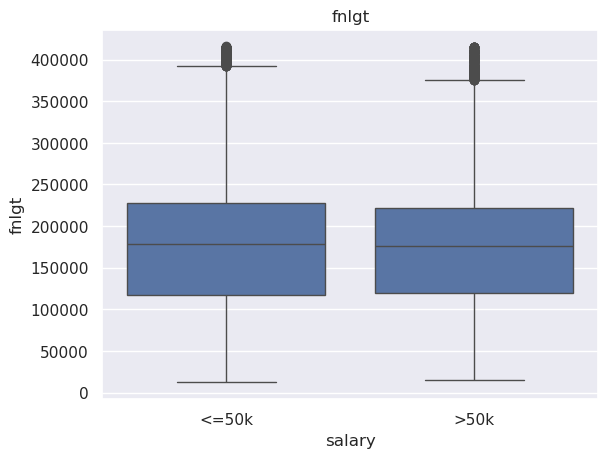

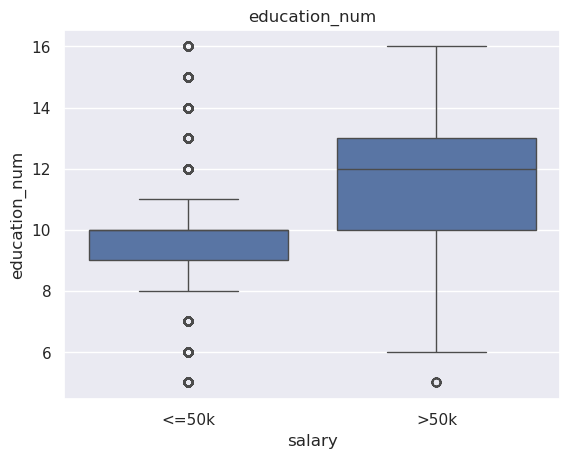

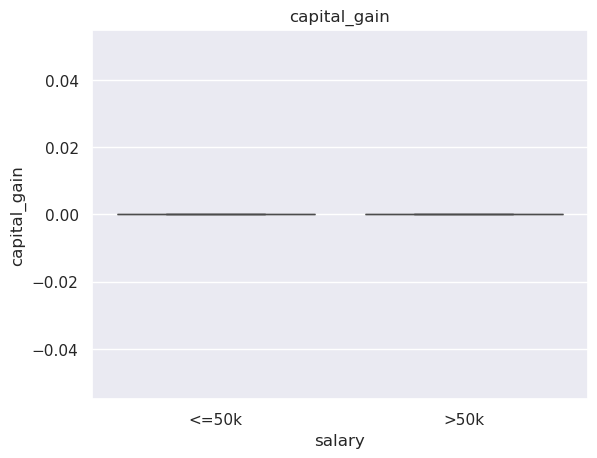

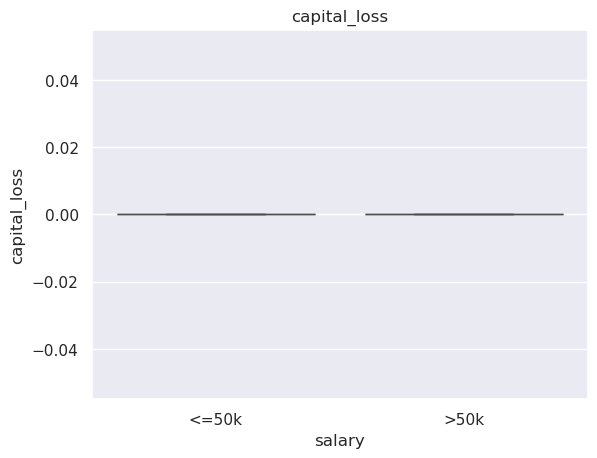

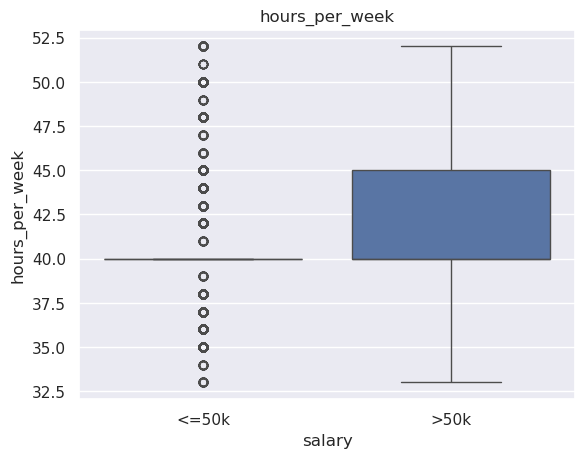

In [62]:
for feature in num_var:
    plot = ed.outlier_detection(df, 'salary', feature)

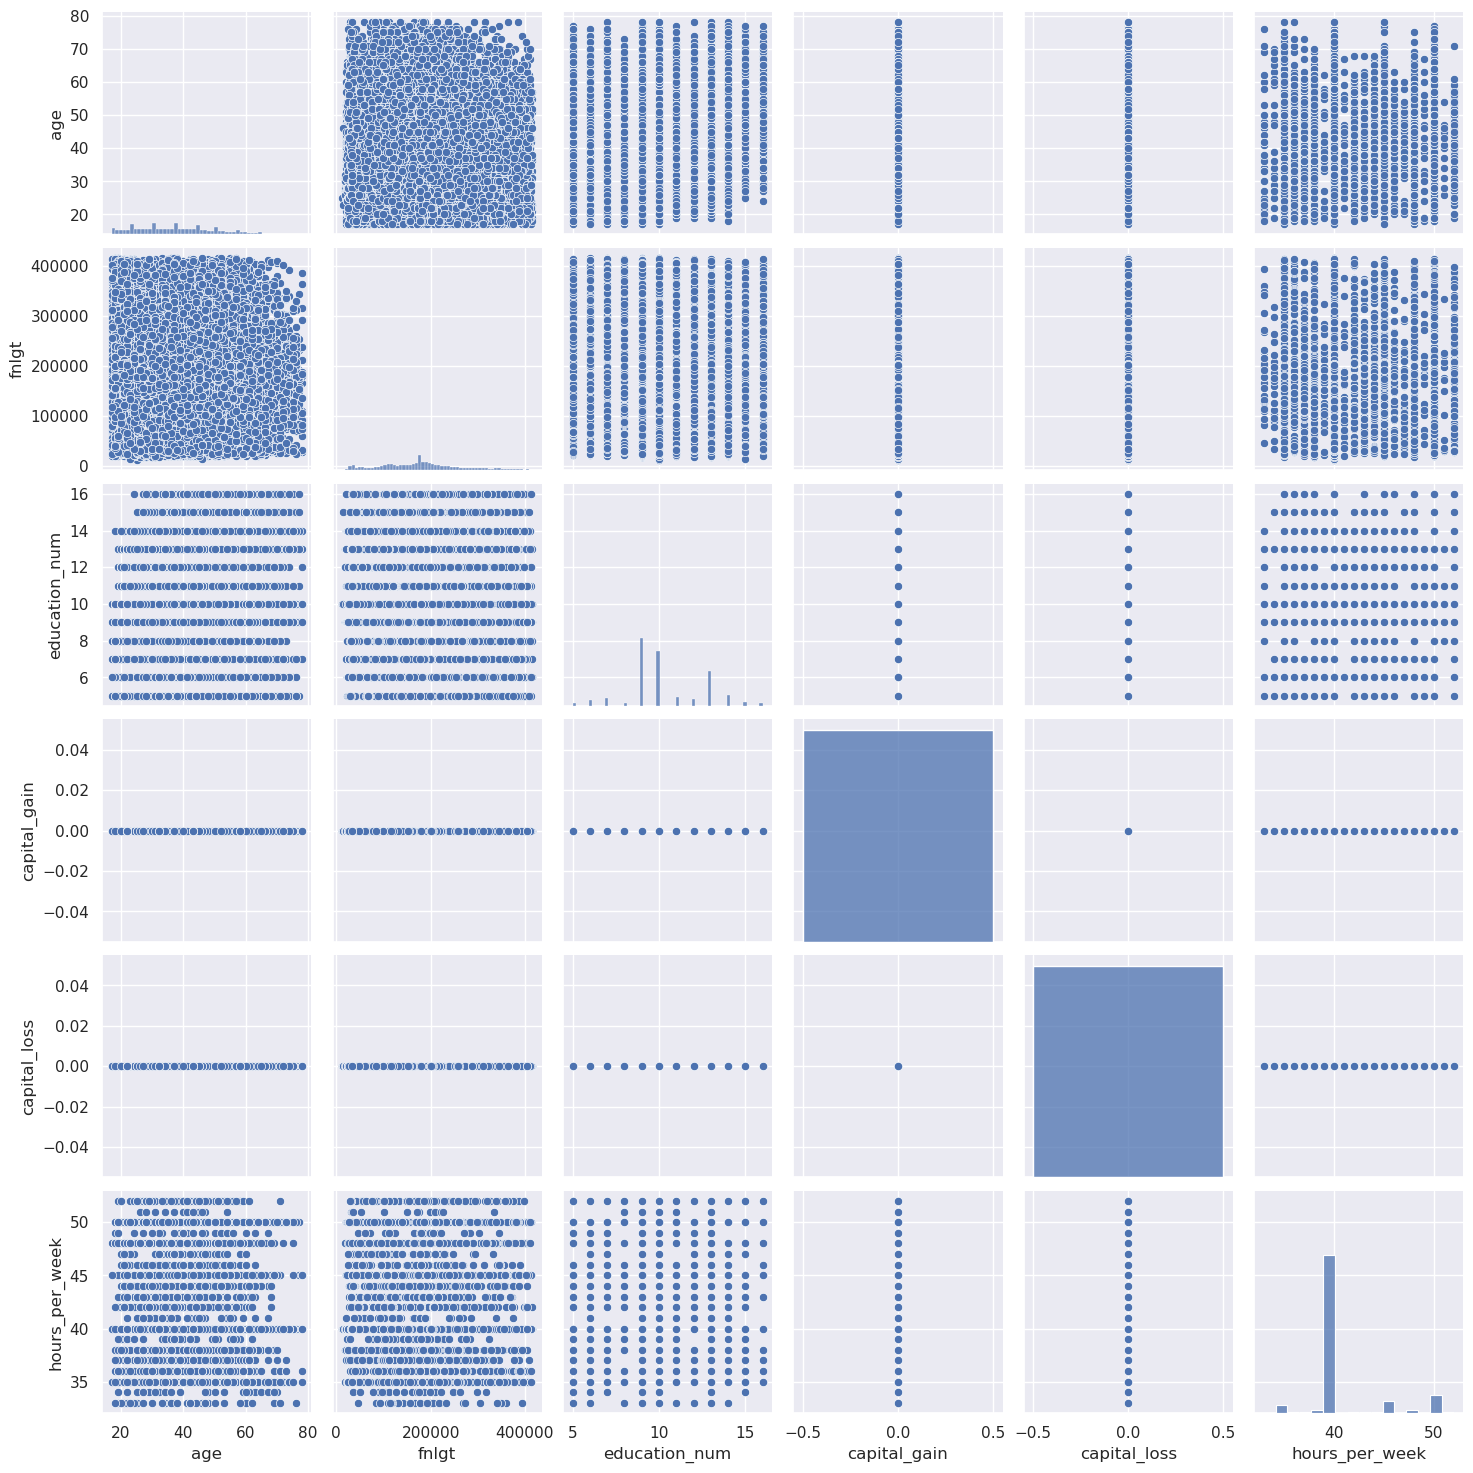

In [63]:
# get pairplots 
sns.pairplot(df)

## Model Selection

#### Preparation

In [64]:
# Inspect unique values in the 'salary' column
print("Unique values in 'salary' column before normalization:", df['salary'].unique())

Unique values in 'salary' column before normalization: ['<=50k' '>50k']


In [65]:
# Strip any leading/trailing whitespace and convert to lower case
df['salary'] = df['salary'].str.strip().str.lower()

In [66]:
# Inspect unique values after normalization
print("Unique values in 'salary' column after normalization:", df['salary'].unique())

Unique values in 'salary' column after normalization: ['<=50k' '>50k']


In [67]:
# Convert 'salary' to binary values
df['salary'] = df['salary'].map({'<=50k': 0, '>50k': 1})

In [68]:
# Check for NaN values to identify any unmapped entries
print("Check for NaN values after mapping:", df['salary'].isna().sum())
print("Values in 'salary' column after mapping:\n", df['salary'])

Check for NaN values after mapping: 0
Values in 'salary' column after mapping:
 0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32537, dtype: int64


In [69]:
# Handle any unmapped entries (if necessary)
if df['salary'].isna().sum() > 0:
    unmapped_values = df.loc[df['salary'].isna(), 'salary']
    print("Unmapped values found:", unmapped_values)

In [70]:
# Confirm the conversion
print("Data types after mapping:\n", df.dtypes)
print("Unique values in 'salary' column:", df['salary'].unique())

Data types after mapping:
 age                int64
workclass         object
fnlgt              int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
salary             int64
dtype: object
Unique values in 'salary' column: [0 1]


In [22]:
# Separate features and target
X = df.drop('salary', axis=1)
y = df['salary']

In [23]:
# Verify the columns after dropping 'salary'
print("Columns in X after dropping 'salary':", X.columns)
print("First few rows of X:\n", X.head())
print("First few rows of y:\n", y.head())

Columns in X after dropping 'salary': Index(['age', 'workclass', 'fnlgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')
First few rows of X:
    age         workclass   fnlgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-clean

In [24]:
# Define categorical and numerical columns from the feature (X) dataset
cat_var1 = [feature for feature in X.columns if X[feature].dtype == 'O']
num_var1 = [feature for feature in X.columns if X[feature].dtype != 'O']

In [25]:
print("Categorical variables:", cat_var1)
print("Numerical variables:", num_var1)

Categorical variables: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
Numerical variables: ['age', 'fnlgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [26]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Check the shape of x_train
print("Shape of x_train:", x_train.shape)

Shape of x_train: (22775, 14)


#### Model estimation using Logistic Regression

In [29]:
# Instantiate the model
lr_model = LogisticRegression(solver='saga', max_iter=3000)

In [30]:
# Get the model pipeline
lr_model = ms.get_model_pipeline(lr_model, cat_var1, num_var1)

In [31]:
# Fit the model pipeline
lr_model.fit(x_train, y_train)

Pipeline(steps=[('features_preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native_country']),
                                                 ('numerical', StandardScaler(),
                                                  ['age', 'fnlgt',
                                                   'education_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week'])])),
                ('model', LogisticRegression(max_iter=3000, solver='saga'))])

In [32]:
y_train_pred = ms.inference_model(lr_model, x_train)
y_test_pred = ms.inference_model(lr_model, x_test)

print("Train metrics")
print("Precision = {}, Recall = {}, F1 = {}".format(*ms.compute_metrics(y_train_pred, y_train)))

print("Test metrics")
print("Precision = {}, Recall = {}, F1 = {}".format(*ms.compute_metrics(y_test_pred, y_test)))

Train metrics
Precision = 0.6655977552861008, Recall = 0.6058008026267786, F1 = 0.7384923282188125
Test metrics
Precision = 0.6697480933672291, Recall = 0.6147645311837081, F1 = 0.7355329949238578


#### Model estimation using Random Forest Classifier

In [33]:
# Initialize Random Forest model
rfc = RandomForestClassifier(random_state=42)

In [34]:
# Get the pipeline with the random forest model
rfc_pipeline = ms.get_model_pipeline(rfc, cat_var1, num_var1)

In [71]:
# grid search for random forest parameters

# Note: it's not necessary to add 'model__' prefix before naming any parameter variables, like 'model__criterion' used here.
# The variable name 'criterion' should also work.
# But sometimes, the GridSearchCV tries to pass the variables parameter directly to the Pipeline object, 
# rather than to the RandomForestClassifier within the pipeline. 
# To address this, it's good practice to specify the parameter names correctly to indicate that 
# they belong to the RandomForestClassifier step of the pipeline.
# In scikit-learn pipelines, parameters of the steps can be accessed using the syntax step_name__parameter_name. 
# In our case, the RandomForestClassifier is named 'model' in the pipeline (ms.get_model_pipeline), so we need to prefix each parameter with model__.
# This will ensure that these parameters belong to the RandomForestClassifier step named 'model' in the pipeline.

param_grid = {
    'model__n_estimators': [200, 500],
    'model__max_features': ['log2', 'sqrt'],
    'model__max_depth': [4, 5, 100],
    'model__criterion': ['gini', 'entropy']
}

In [37]:
# gridserach instantiation
cv_rfc = GridSearchCV(estimator=rfc_pipeline, param_grid=param_grid, cv=5)

In [38]:
# Train Ramdom Forest using GridSearch
cv_rfc.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features_preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinalencoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=1000))]),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital_status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'sex',
                                                                          'native_country']),
                                                                        ('numerical',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'fnlgt',
                                                                          'education_num',
                                                                          'capital_gain',
                                                                          'capital_loss',
                                                                          'hours_per_week'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [4, 5, 100],
                         'model__max_features': ['log2', 'sqrt'],
                         'model__n_estimators': [200, 500]})

In [39]:
# get predictions
y_train_preds_rf = cv_rfc.best_estimator_.predict(x_train)
y_test_preds_rf = cv_rfc.best_estimator_.predict(x_test)

In [40]:
#get metrics
print("Train metrics")
print("Precision = {}, Recall = {}, F1 = {}".format(*ms.compute_metrics(y_train_preds_rf, y_train)))

print("Test metrics")
print("Precision = {}, Recall = {}, F1 = {}".format(*ms.compute_metrics(y_test_preds_rf, y_test)))

Train metrics
Precision = 0.9999087840919456, Recall = 0.9998175848230573, F1 = 1.0
Test metrics
Precision = 0.6789497927222478, Recall = 0.62537123462028, F1 = 0.7425692695214106


##### Based on the above metrics for both models, Random Forest gives slightly better results than Logistic Regression.